<a href="https://colab.research.google.com/github/iam-fern/Research/blob/main/generate_data_new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from numpy.random import normal
import statistics
import statistics as stats
import scipy.stats as ss
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
%matplotlib inline
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# random.uniform(a, b)
# Syntax : numpy.random.uniform(low=0.0, high=1.0, size=None)
# a : Required. A number specifying the lowest possible outcome
# b : Required. A number specifying the highest possible outcome

data = pd.DataFrame({"z1" : np.random.uniform(10, 50, 500000),
                     "z2" : np.random.uniform(10, 50, 500000),
                     "z3" : np.random.uniform(10, 50, 500000)})
data

,z1,z2,z3
0,37.802015,17.761136,34.691182
1,36.530762,49.075284,13.830510
2,14.477042,27.460392,11.036471
3,14.089876,34.260251,10.518214
4,19.692962,16.506561,32.885710
...,...,...,...
499995,28.684631,37.377177,20.729494
499996,21.453927,25.696087,35.528689
499997,26.704086,12.918015,30.899425
499998,26.625898,26.126795,36.580697


In [4]:
z1 = data['z1']
z2 = data['z2']
z3 = data['z3']

In [5]:
x1 = z1
x2 = z2
x3 = z3

In [ ]:
new_data = pd.DataFrame({"x1" : data['z1'],
                         "x2" : data['z2'],
                         "x3" : data['z3'],
                         "e"  : np.random.normal(0, x1**6, 500000)})

In [6]:
new_data = pd.DataFrame({"x1" : data['z1'],
                         "x2" : data['z2'],
                         "x3" : data['z3'],
                         "e"  : np.random.normal(0, x1**6, 500000)})

In [7]:
n=50
rep=0
table_data_all=pd.DataFrame({"rep":[]})
data_copy=new_data.copy()
while not data_copy.empty:
    #=========================
    if data_copy.shape[0]>n:
        index=data_copy.sample(n).index
        data_new=data_copy.loc[index,:].reset_index(drop=True)
        data_copy=data_copy.drop(index)
    else:
        data_new=data_copy.copy().reset_index(drop=True)
        data_copy=pd.DataFrame({"":[]})
    #=========================

    table_data = pd.DataFrame({'x1' : data_new['x1'],
                               'x2' : data_new['x2'],
                               'x3' : data_new['x3'],
                               'e'  : data_new['e']})
  

    table_data['Y'] = 5 + 10*table_data['x1'] + table_data['x2'] + table_data['x3'] + table_data['e']
    #table_data['Y_hat'] = 4+0.4*table_data['Xt1']+1.5*table_data['Xt2']+3.6*table_data['Xt3']
    
    table_data=table_data.reset_index(drop=True).reset_index()
    table_data["rep"]=rep
    table_data_all=pd.concat([table_data_all,table_data],axis=0,ignore_index=True,sort=False)
    rep+=1
    if rep==100:
      break
table_data_all=table_data_all.set_index(["rep","index"])
table_data_all

x1         x2         x3             e             Y
rep  index                                                             
0.0  0.0    15.664463  33.549879  21.577989 -8.795483e+06 -8.795266e+06
     1.0    43.094629  10.742496  21.772447 -4.736806e+09 -4.736806e+09
     2.0    14.309655  12.277679  38.074888  8.371010e+06  8.371208e+06
     3.0    47.432676  42.396775  21.611796  4.899922e+09  4.899923e+09
     4.0    30.240323  37.426796  18.361415 -5.042831e+08 -5.042828e+08
...               ...        ...        ...           ...           ...
99.0 45.0   11.711733  12.097388  34.847377  5.904227e+06  5.904396e+06
     46.0   47.316663  49.274670  39.398031 -6.504147e+09 -6.504146e+09
     47.0   25.796852  15.997932  32.989470  1.627609e+08  1.627612e+08
     48.0   10.862142  26.158495  33.650546 -6.300507e+05 -6.298772e+05
     49.0   31.174159  10.584933  17.678516 -9.567325e+08 -9.567322e+08

[5000 rows x 5 columns]

In [ ]:
table_data_new.to_csv('sampling_1000rep_n50_2020.csv')
files.download('sampling_1000rep_n50_2020.csv')

In [8]:
x = table_data_all[['x1', 'x2', 'x3',]]
y = table_data_all['Y']
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
y_pred = model.predict(x)

In [10]:
df = pd.DataFrame({'Actual': y, 'Predicted': y_pred})

In [11]:
table_data_new = pd.DataFrame({'x1'   : table_data_all['x1'],
                               'x2'   : table_data_all['x2'],
                               'x3'   : table_data_all['x3'],
                               'e'     : table_data_all['e'],
                               'Y'     : df['Actual'],
                               'y_hat' : df['Predicted']})
table_data_new['e_hat'] = table_data_new['Y']-table_data_new['y_hat']
table_data_new

x1         x2  ...         y_hat         e_hat
rep  index                        ...                            
0.0  0.0    15.664463  33.549879  ...  1.489033e+07 -2.368560e+07
     1.0    43.094629  10.742496  ... -7.606243e+06 -4.729199e+09
     2.0    14.309655  12.277679  ... -6.766850e+07  7.603971e+07
     3.0    47.432676  42.396775  ...  1.312166e+08  4.768706e+09
     4.0    30.240323  37.426796  ...  6.619081e+07 -5.704736e+08
...               ...        ...  ...           ...           ...
99.0 45.0   11.711733  12.097388  ... -7.631987e+07  8.222427e+07
     46.0   47.316663  49.274670  ...  1.660624e+08 -6.670209e+09
     47.0   25.796852  15.997932  ... -2.560690e+07  1.883681e+08
     48.0   10.862142  26.158495  ... -2.216073e+07  2.153085e+07
     49.0   31.174159  10.584933  ... -4.016756e+07 -9.165646e+08

[5000 rows x 7 columns]

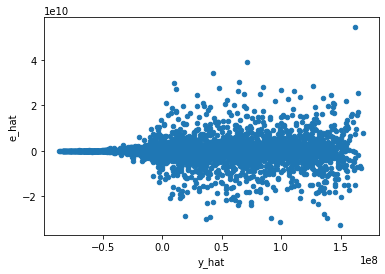

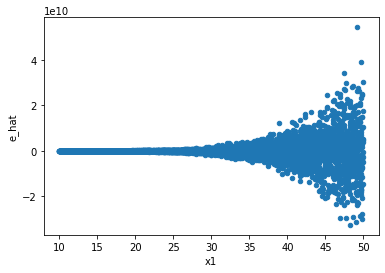

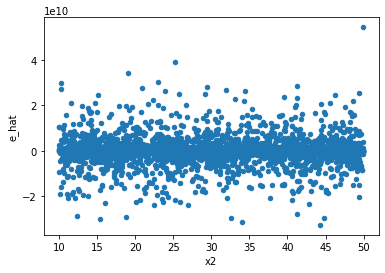

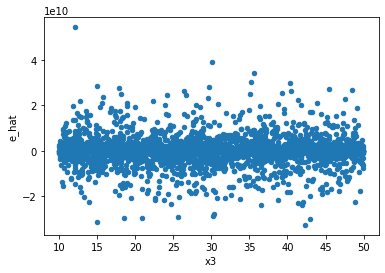

In [13]:
table_data_new.plot(x ='y_hat', y='e_hat', kind = 'scatter')
table_data_new.plot(x ='x1', y='e_hat', kind = 'scatter')
table_data_new.plot(x ='x2', y='e_hat', kind = 'scatter')
table_data_new.plot(x ='x3', y='e_hat', kind = 'scatter')